# Part (c): Analysis Of Variance (ANOVA)
# NEHA NAIR - PES2UG22CS348
# NATASHA SANTOSH ABRAHAM - PES2UG22CS342
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [32]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/assignment-1c/productivity_data_owa.csv", header=TRUE)
head(data)

,Sl_No,RemoteWorkSetting,ProductivityScore
,<int>,<chr>,<dbl>
1,0,Hybrid,93.08691
2,1,Coworking space,95.43247
3,2,Hybrid,71.42055
4,3,Hybrid,70.34142
5,4,Home office,64.21400
6,5,Hybrid,59.74954


*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

Skewness for Hybrid : -0.1642834

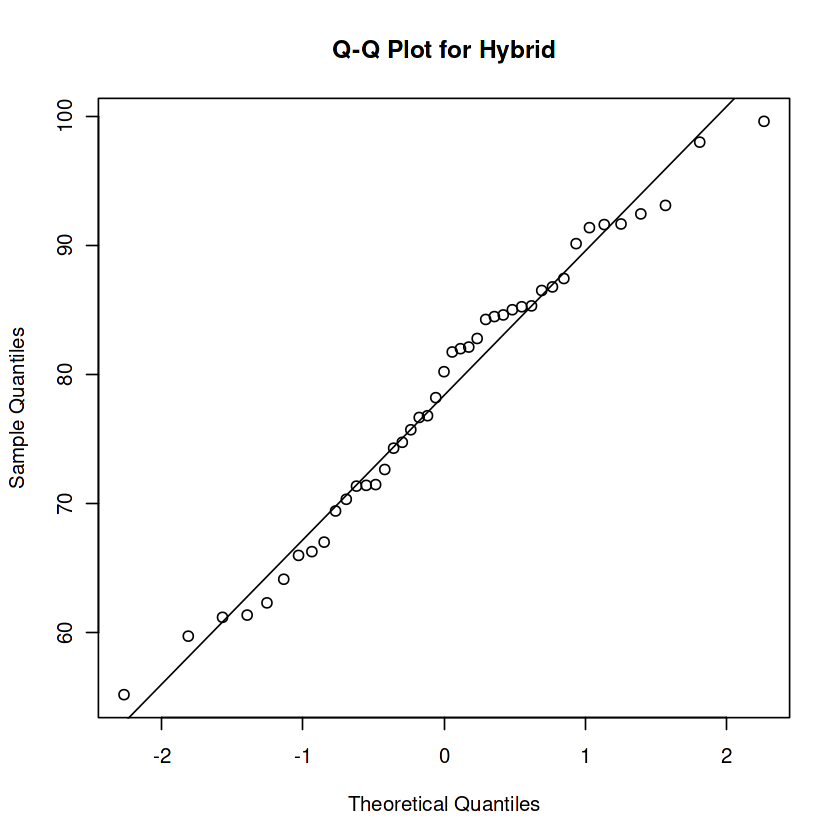

Skewness for Coworking space : -0.4742426

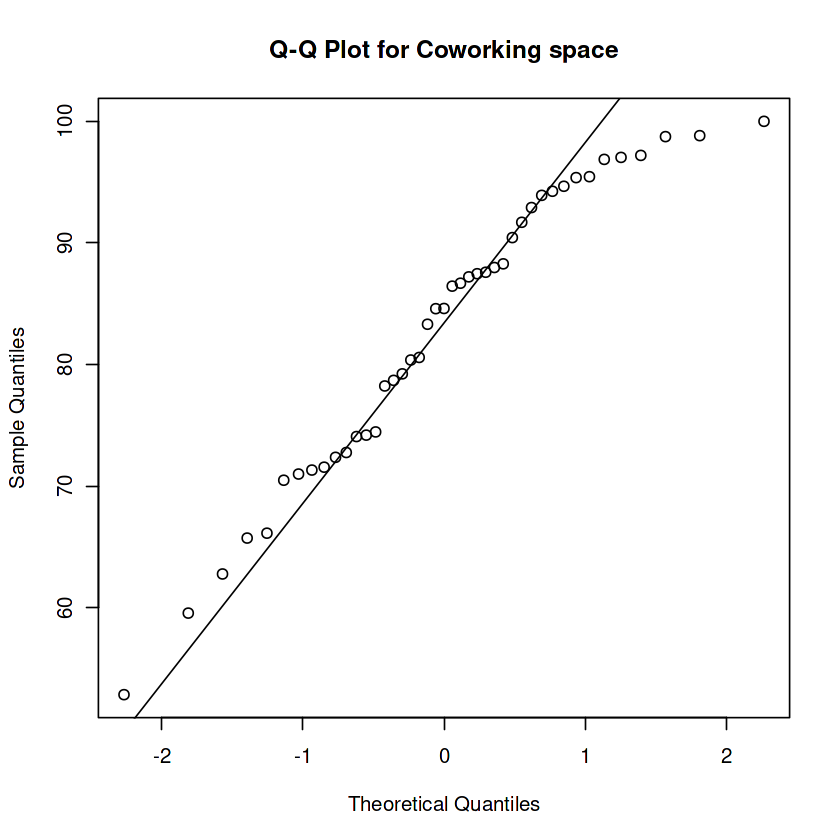

Skewness for Home office : -0.007568926

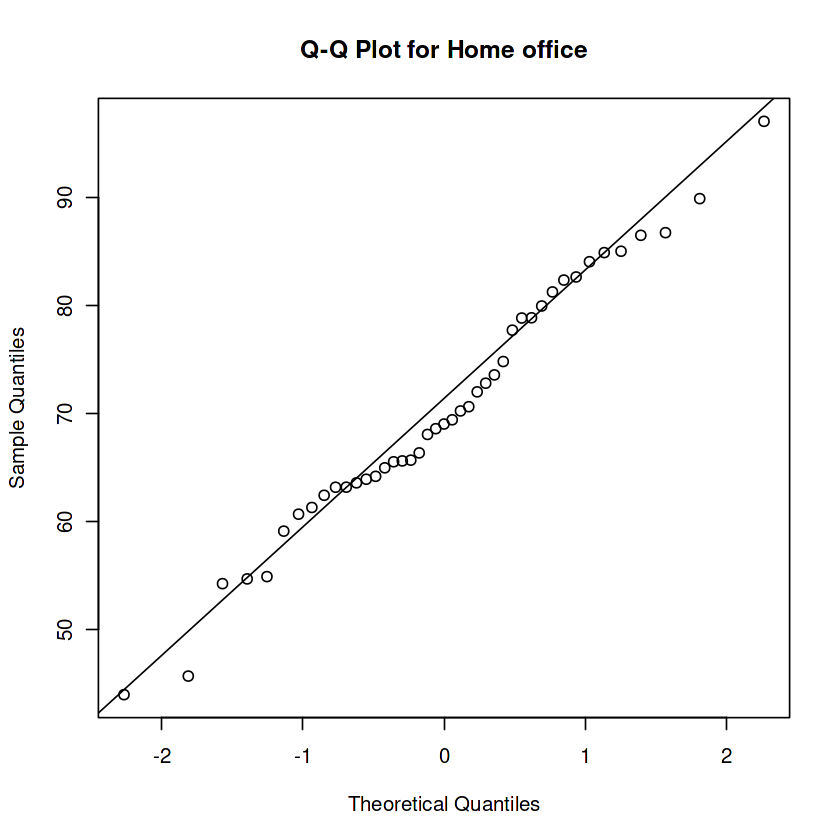

In [33]:
# Your answer here.
library(moments)

work_settings <- unique(data$RemoteWorkSetting)
for (setting in work_settings) 
{
  group_data <- data[data$RemoteWorkSetting==setting,]
  qqnorm(group_data$ProductivityScore, main=paste("Q-Q Plot for", setting))
  qqline(group_data$ProductivityScore)
  cat("Skewness for", setting,":", skewness(group_data$ProductivityScore))
}

*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


In [35]:
# Your answer here.
anova_result <- aov(ProductivityScore~RemoteWorkSetting, data=data)
summary(anova_result)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The F-value is 12.5 indicating that the variation between groups is significantly higher than the variations within groups.
The p-value is much smaller than the significance value which means we reject the null hypothesis.

This means that the work setting has a significant impact on the productivity score.


*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [36]:
# Your answer here.
tukey <-TukeyHSD(anova_result, conf.level = 0.95)
print(tukey)

tukey2 <-TukeyHSD(anova_result, conf.level = 0.98)
print(tukey2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685

  Tukey multiple comparisons of means
    98% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -19.083660 -5.493011 0.0000077
Hybrid-Coworking space       -4.298428 -11.093753  2.496897 0.2005429
Hybrid-Home office            7.989907   1.194583 14.785232 0.0048685



### Significance Level 0.05:

#### Based on the results, at a significance level of 0.05:
Home office and Coworking space have *significantly* different mean productivity scores.
Hybrid and Coworking space have some difference in mean productivity scores.
Hybrid and Home office have different in mean productivity scores.

### Significance Level 0.02:
At a significance level of 0.02, the results remain the same as at 0.05.

### Difference in Productivity:
The pair of Home office and Coworking space shows highest difference in productivity since p-value is smallest (much smaller than significance level value)

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [39]:
data <- read.csv("/kaggle/input/assignment-1c/productivity_data_twa.csv", header=TRUE)
head(data)

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


In [40]:
# your answer here
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data)
summary(anova_result)

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

* F-statistic = 1.742 indicates a weak interaction effect.
* P-value = 0.1454 is much larger than α (0.05)

* Therefore we fail to reject the null hypothesis for the interaction effect

* There is no statistically significant evidence to suggest that the combination of a specific work setting and communication tool has an effect on productivity.

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


In [42]:
# your answer here.
mean_productivity <- aggregate(ProductivityScore ~ RemoteWorkSetting+CommunicationTool, data=data, FUN=mean)

mean_productivity <- mean_productivity[order(-mean_productivity$ProductivityScore), ]

most_effective<- head(mean_productivity, 1)
print(most_effective)


  RemoteWorkSetting CommunicationTool ProductivityScore
1   Coworking space             Email          87.28849


#### coworking space with email would be the best possible strategy to adopt

*fin*